# Predicting ADHD from Resting-State fMRI

In this project, we work on resting-state fMRI data to investigate brain connectivity patterns.
 

In [2]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets, maskers, plotting
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure


# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


   - This section imports the necessary Python libraries for various tasks:
     - `os`: This module provides a portable way of using operating system-dependent functionality.
     - `pandas as pd`: Pandas is a powerful data manipulation library. It's commonly imported as `pd` for brevity.
     - `numpy as np`: NumPy is a library for numerical computing in Python. It's often imported as `np` for brevity.
     - `matplotlib.pyplot as plt`: Matplotlib is a plotting library for Python. The `pyplot` module provides a MATLAB-like interface for plotting.
     - `seaborn as sns`: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
     - `nilearn.datasets`: Nilearn is a Python module for fast and easy statistical learning on neuroimaging data. It provides datasets and tools specifically tailored for neuroimaging analysis.
     - `nilearn.maskers`: This submodule contains tools for extracting data from neuroimaging data formats.
     - `nilearn.plotting`: This submodule provides functions to plot various neuroimaging data.
     - `NiftiLabelsMasker`: This class in Nilearn is used to extract time series from regions defined by labels in a Nifti image.
     - `ConnectivityMeasure`: This class in Nilearn is used to compute connectivity matrices from neuroimaging data.


In [3]:

data = datasets.fetch_adhd(n_subjects=None, data_dir=None, url=None, resume=True, verbose=1)

This line of code is using the `fetch_adhd` function from the `datasets` module in the `nilearn` library to download the ADHD dataset. Let's break down the parameters used in this function:

- `n_subjects`: This parameter specifies the number of subjects to fetch from the dataset. When set to `None`, it fetches all available subjects.
- `data_dir`: This parameter specifies the directory where the data will be stored. When set to `None`, it uses the default data directory.
- `url`: This parameter specifies the URL from which to download the dataset. When set to `None`, it uses the default URL.
- `resume`: This parameter determines whether to resume downloading if a partial download exists. When set to `True`, it resumes the download if it was interrupted.
- `verbose`: This parameter controls the verbosity of the output during the download process. When set to `1`, it displays progress information during the download.

Once executed, this line will download the ADHD dataset and store it in the specified directory (or the default directory if none is provided). It will fetch all available subjects in the dataset. Additionally, it will display progress information during the download process.

In [4]:

# Get the keys

print('Keys:',list(data.keys()))

# Get the number of subjects

print('Number of subjects:', len(data.func))

Keys: ['func', 'confounds', 'phenotypic', 'description']
Number of subjects: 40


In [5]:
data.description

"ADHD 200\n\n\nNotes\n-----\nPart of the 1000 Functional Connectome Project. Phenotypic\ninformation includes: diagnostic status, dimensional ADHD symptom measures,\nage, sex, intelligence quotient (IQ) and lifetime medication status.\nPreliminary quality control assessments (usable vs. questionable) based upon\nvisual timeseries inspection are included for all resting state fMRI scans.\n\nIncludes preprocessed data from 40 participants.\n\nProject was coordinated by Michael P. Milham.\n\nContent\n-------\n    :'func': Nifti images of the resting-state data\n    :'phenotypic': Explanations of preprocessing steps\n    :'confounds': CSV files containing the nuisance variables\n\nReferences\n----------\nFor more information about this dataset's structure:\nhttp://fcon_1000.projects.nitrc.org/indi/adhd200/index.html\n\nLicence: usage is unrestricted for non-commercial research purposes.\n"

The `data.description` provides detailed information about the ADHD dataset.

- **Dataset Name**: ADHD 200
- **Notes**:
  - This dataset is part of the 1000 Functional Connectome Project.
  - Phenotypic information includes diagnostic status, dimensional ADHD symptom measures, age, sex, intelligence quotient (IQ), and lifetime medication status.
  - Preliminary quality control assessments (usable vs. questionable) based on visual timeseries inspection are included for all resting-state fMRI scans.
  - It includes preprocessed data from 40 participants.
  - The project was coordinated by Michael P. Milham.
  
- **Content**:
  - `'func'`: Nifti images of the resting-state data.
  - `'phenotypic'`: Explanations of preprocessing steps.
  - `'confounds'`: CSV files containing the nuisance variables.
  
- **References**:
  - For more information about the dataset's structure, a reference link is provided: [ADHD 200 Dataset Structure](http://fcon_1000.projects.nitrc.org/indi/adhd200/index.html).
  
- **License**:
  - Usage is unrestricted for non-commercial research purposes.


### Explore the Target Variable (Y)

In [6]:
# Let's load the phenotype data

pheno = pd.DataFrame(data.phenotypic)

This line of code loads the phenotype data from the ADHD dataset into a Pandas DataFrame named `pheno`. 

- **Loading Phenotype Data**:

  - `data.phenotypic`: This accesses the phenotypic data from the `data` object, which is assumed to be a dictionary-like object containing various components of the ADHD dataset, including the phenotype information.

  - `pd.DataFrame()`: This function from the Pandas library converts the phenotypic data into a DataFrame, a two-dimensional labeled data structure with columns of potentially different types.

  - `pheno`: This variable is assigned to hold the DataFrame containing the phenotype data.

After executing this line, the `pheno` DataFrame will contain the phenotype information from the ADHD dataset, with each row representing a subject and each column representing a specific phenotypic variable (e.g., diagnostic status, ADHD symptom measures, age, sex, IQ, medication status).

In [7]:
# INFO

df = pheno

# Display the shape of the data
print("Data Shape:")
print(df.shape)

# Check for any duplicate entries in the data.
print('')
print("Duplicate Values:")
print('(',df.duplicated().sum(),')')


# Display the data types of the columns
print("\nData Types:")
print(df.dtypes.value_counts())

# Check for missing values
missing_columns = df.columns[df.isnull().any()]
if missing_columns.size > 0:
    missing_values = df[missing_columns].isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    # Combine missing_values and missing_percentage into a single DataFrame
    missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

    # Sort the missing_data DataFrame by Total column in descending order
    missing_data = missing_data.sort_values(by='Total', ascending=False)

    # Print missing data
    print("\nMissing Data:")
    print(missing_data.to_string())
else:
    print("\nNo Missing Values Found")



Data Shape:
(40, 65)

Duplicate Values:
( 0 )

Data Types:
object     54
float64     7
int32       4
Name: count, dtype: int64

No Missing Values Found


In [8]:
pheno.head(5)

f0  Subject  RestScan  MeanFD  NumFD_greater_than_020  rootMeanSquareFD  \
0  "21"    10042  "rest_1"  0.0559                       0            0.2365   
1  "19"    10064  "rest_1"  0.0623                       0            0.2496   
2  "22"    10128  "rest_1"  0.0689                       0            0.2624   
3  "20"    21019  "rest_1"  0.0575                       0            0.2398   
4  "30"    23008  "rest_1"  0.0801                       7            0.2831   

   FDquartiletop14thFD  PercentFD_greater_than_020  MeanDVARS  \
0               0.0922                      0.0000     2.2915   
1               0.0926                      0.0000     2.0866   
2               0.1132                      0.0000     2.1422   
3               0.0955                      0.0000     2.0339   
4               0.1710                      8.9744    13.4263   

   MeanFD_Jenkinson  ... sess_1_rest_6_eyes sess_1_anat_1 sess_1_which_anat  \
0            1.0089  ...                 NA        "pass"                NA   
1            0.9943  ...                 NA        "pass"                NA   
2            1.2641  ...                 NA        "pass"                NA   
3            1.1973  ...                 NA        "pass"                NA   
4            1.7741  ...                 NA        "pass"                NA   

   sess_2_rest_1 sess_2_rest_1_eyes sess_2_rest_2 sess_2_rest_2_eyes  \
0             NA                 NA            NA                 NA   
1             NA                 NA            NA                 NA   
2             NA                 NA            NA                 NA   
3             NA                 NA            NA                 NA   
4             NA                 NA            NA                 NA   

  sess_2_anat_1 defacing_ok defacing_notes  
0            NA          ""             ""  
1            NA          ""             ""  
2            NA          ""             ""  
3            NA       "yes"             ""  
4            NA       "yes"             ""  

[5 rows x 65 columns]

In [9]:
pheno[['tdc','adhd','age','sex']].head(10)

tdc  adhd    age  sex
0    0     1  10.65  "M"
1    0     1  15.90  "M"
2    1     0   9.53  "M"
3    1     0  15.53  "M"
4    1     0   9.17  "M"
5    0     1  11.33  "F"
6    0     1  20.82  "M"
7    0     1  19.08  "M"
8    0     1  13.35  "M"
9    0     1  17.74  "M"

In [10]:
print('Number of classes:',pheno['sex'].value_counts())

Number of classes: sex
"M"    35
"F"     5
Name: count, dtype: int64


Number of classes: [1 0]
adhd
1    20
0    20
Name: count, dtype: int64


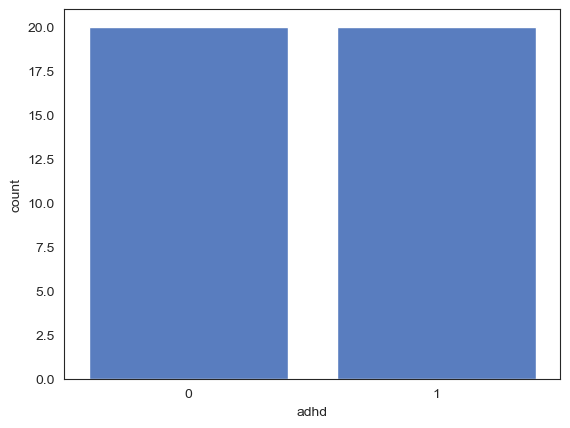

In [11]:
y = pheno['adhd']

print('Number of classes:',y.unique())

sns.set_style("white")
sns.set_palette("muted")
sns.countplot(x= y)

print(y.value_counts())

AGE DISTRIBUTION

In [12]:
age = pheno['age']

age.describe()

count    40.000000
mean     12.503586
std       3.373002
min       8.580000
25%       9.830000
50%      11.330000
75%      14.580000
max      20.820000
Name: age, dtype: float64

Asymmetry: 0.000000
Kurtosis: -2.108108


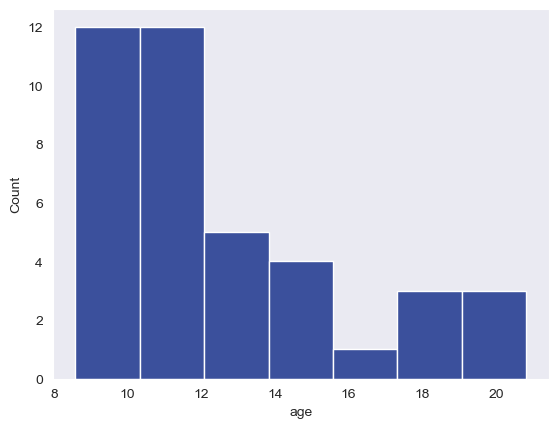

In [13]:
sns.set_style("dark")
sns.set_palette("dark")
sns.histplot(age)

#skewness and kurtosis
print("Asymmetry: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

The provided values represent the skewness and kurtosis of the 'age' column in the ADHD dataset.

- **Skewness**: 
  - Skewness measures the asymmetry of the distribution of values in a dataset. 
  - A skewness of 0 indicates a symmetric distribution.
  - In this case, the skewness value of 0.000000 suggests that the distribution of ages is approximately symmetric.

- **Kurtosis**:
  - Kurtosis measures the "tailedness" or the degree of outliers in the distribution of values.
  - A negative kurtosis indicates a platykurtic distribution, meaning the distribution has thinner tails and fewer outliers compared to a normal distribution.
  - The kurtosis value of -2.108108 suggests a platykurtic distribution for the ages in this dataset, indicating fewer outliers compared to a normal distribution.


**Load the atlas**

* The DiFuMo atlas provides dictionaries of functional modes optimized for extracting functional signals from fMRI data, available in various dimensionalities (64, 128, 256, 512, and 1024).

* Has multiple resolutions, for larger networks or finer-grained ROIs. 

Let's use a 64-ROI atlas to allow some detail, but to ultimately keep our connectivity matrices manageable


In [14]:
dim = 64
difumo = datasets.fetch_atlas_difumo(
    dimension=dim, resolution_mm=2, legacy_format=False
)

atlas_filename = difumo.maps




This code segment loads the DiFuMo atlas, which provides dictionaries of functional modes optimized for extracting functional signals from fMRI data.
1. **Specifying Atlas Dimensionality**:
 
   - This line sets the desired dimensionality of the atlas to 64. This means the atlas will contain 64 regions of interest (ROIs).

2. **Fetching the Atlas**:

   - This line fetches the DiFuMo atlas using the `fetch_atlas_difumo` function from the `datasets` module in the `nilearn` library.
   - Parameters:
     - `dimension=dim`: Specifies the desired dimensionality of the atlas.
     - `resolution_mm=2`: Sets the resolution of the atlas in millimeters. Here, it's set to 2 mm.
     - `legacy_format=False`: This parameter is set to `False`, indicating that the fetched atlas will use the non-legacy format.

3. **Accessing Atlas Filename**:

   - This line extracts the filename of the atlas maps from the fetched `difumo` object.

After executing this code, the variable `atlas_filename` will contain the filename of the DiFuMo atlas maps corresponding to the specified dimensionality (64 ROIs) and resolution. 

In [15]:
difumo.labels

component                       difumo_names     yeo_networks7  \
0           1            Superior frontal sulcus          DefaultB   
1           2                     Fusiform gyrus  No network found   
2           3         Calcarine cortex posterior           VisCent   
3           4         Cingulate cortex posterior          DefaultB   
4           5  Parieto-occipital sulcus superior             ContA   
..        ...                                ...               ...   
59         60                             Cuneus           VisCent   
60         61              Middle temporal gyrus          DefaultB   
61         62             Superior frontal gyrus          DefaultB   
62         63                     Central sulcus           SomMotA   
63         64                            Caudate  No network found   

      yeo_networks17        gm        wm       csf  
0           DefaultA  0.689996  0.185709  0.116884  
1   No network found  0.844733  0.021026  0.133789  
2            VisPeri  0.601768  0.302067  0.091297  
3           DefaultA  0.740086  0.140368  0.119567  
4              ContC  0.640157  0.241492  0.117826  
..               ...       ...       ...       ...  
59           VisPeri  0.627179  0.269783  0.103005  
60          DefaultB  0.726527  0.149595  0.107329  
61          DefaultB  0.651182  0.062243  0.224067  
62           SomMotB  0.578502  0.291674  0.109244  
63  No network found  0.703295  0.260386  0.036332  

[64 rows x 7 columns]

The provided data contains information about the labels of the regions in the DiFuMo atlas.

- **Columns**:
  - `component`: Represents the index or identifier of each region in the atlas.
  - `difumo_names`: Provides the name of the region according to the DiFuMo atlas.
  - `yeo_networks7`: Indicates the Yeo 7-network assignment for the region.
  - `yeo_networks17`: Indicates the Yeo 17-network assignment for the region.
  - `gm`: Represents the gray matter probability for the region.
  - `wm`: Represents the white matter probability for the region.
  - `csf`: Represents the cerebrospinal fluid probability for the region.

- **Rows**:
  - Each row corresponds to a specific region in the atlas, indexed by the `component` column.

- **Data**:
  - The data provides information about the anatomical and network assignments of each region, as well as probabilities of gray matter, white matter, and cerebrospinal fluid for each region.

This information is useful for understanding the anatomical and functional properties associated with each region in the DiFuMo atlas, which can be utilized in various neuroimaging analyses and interpretations.

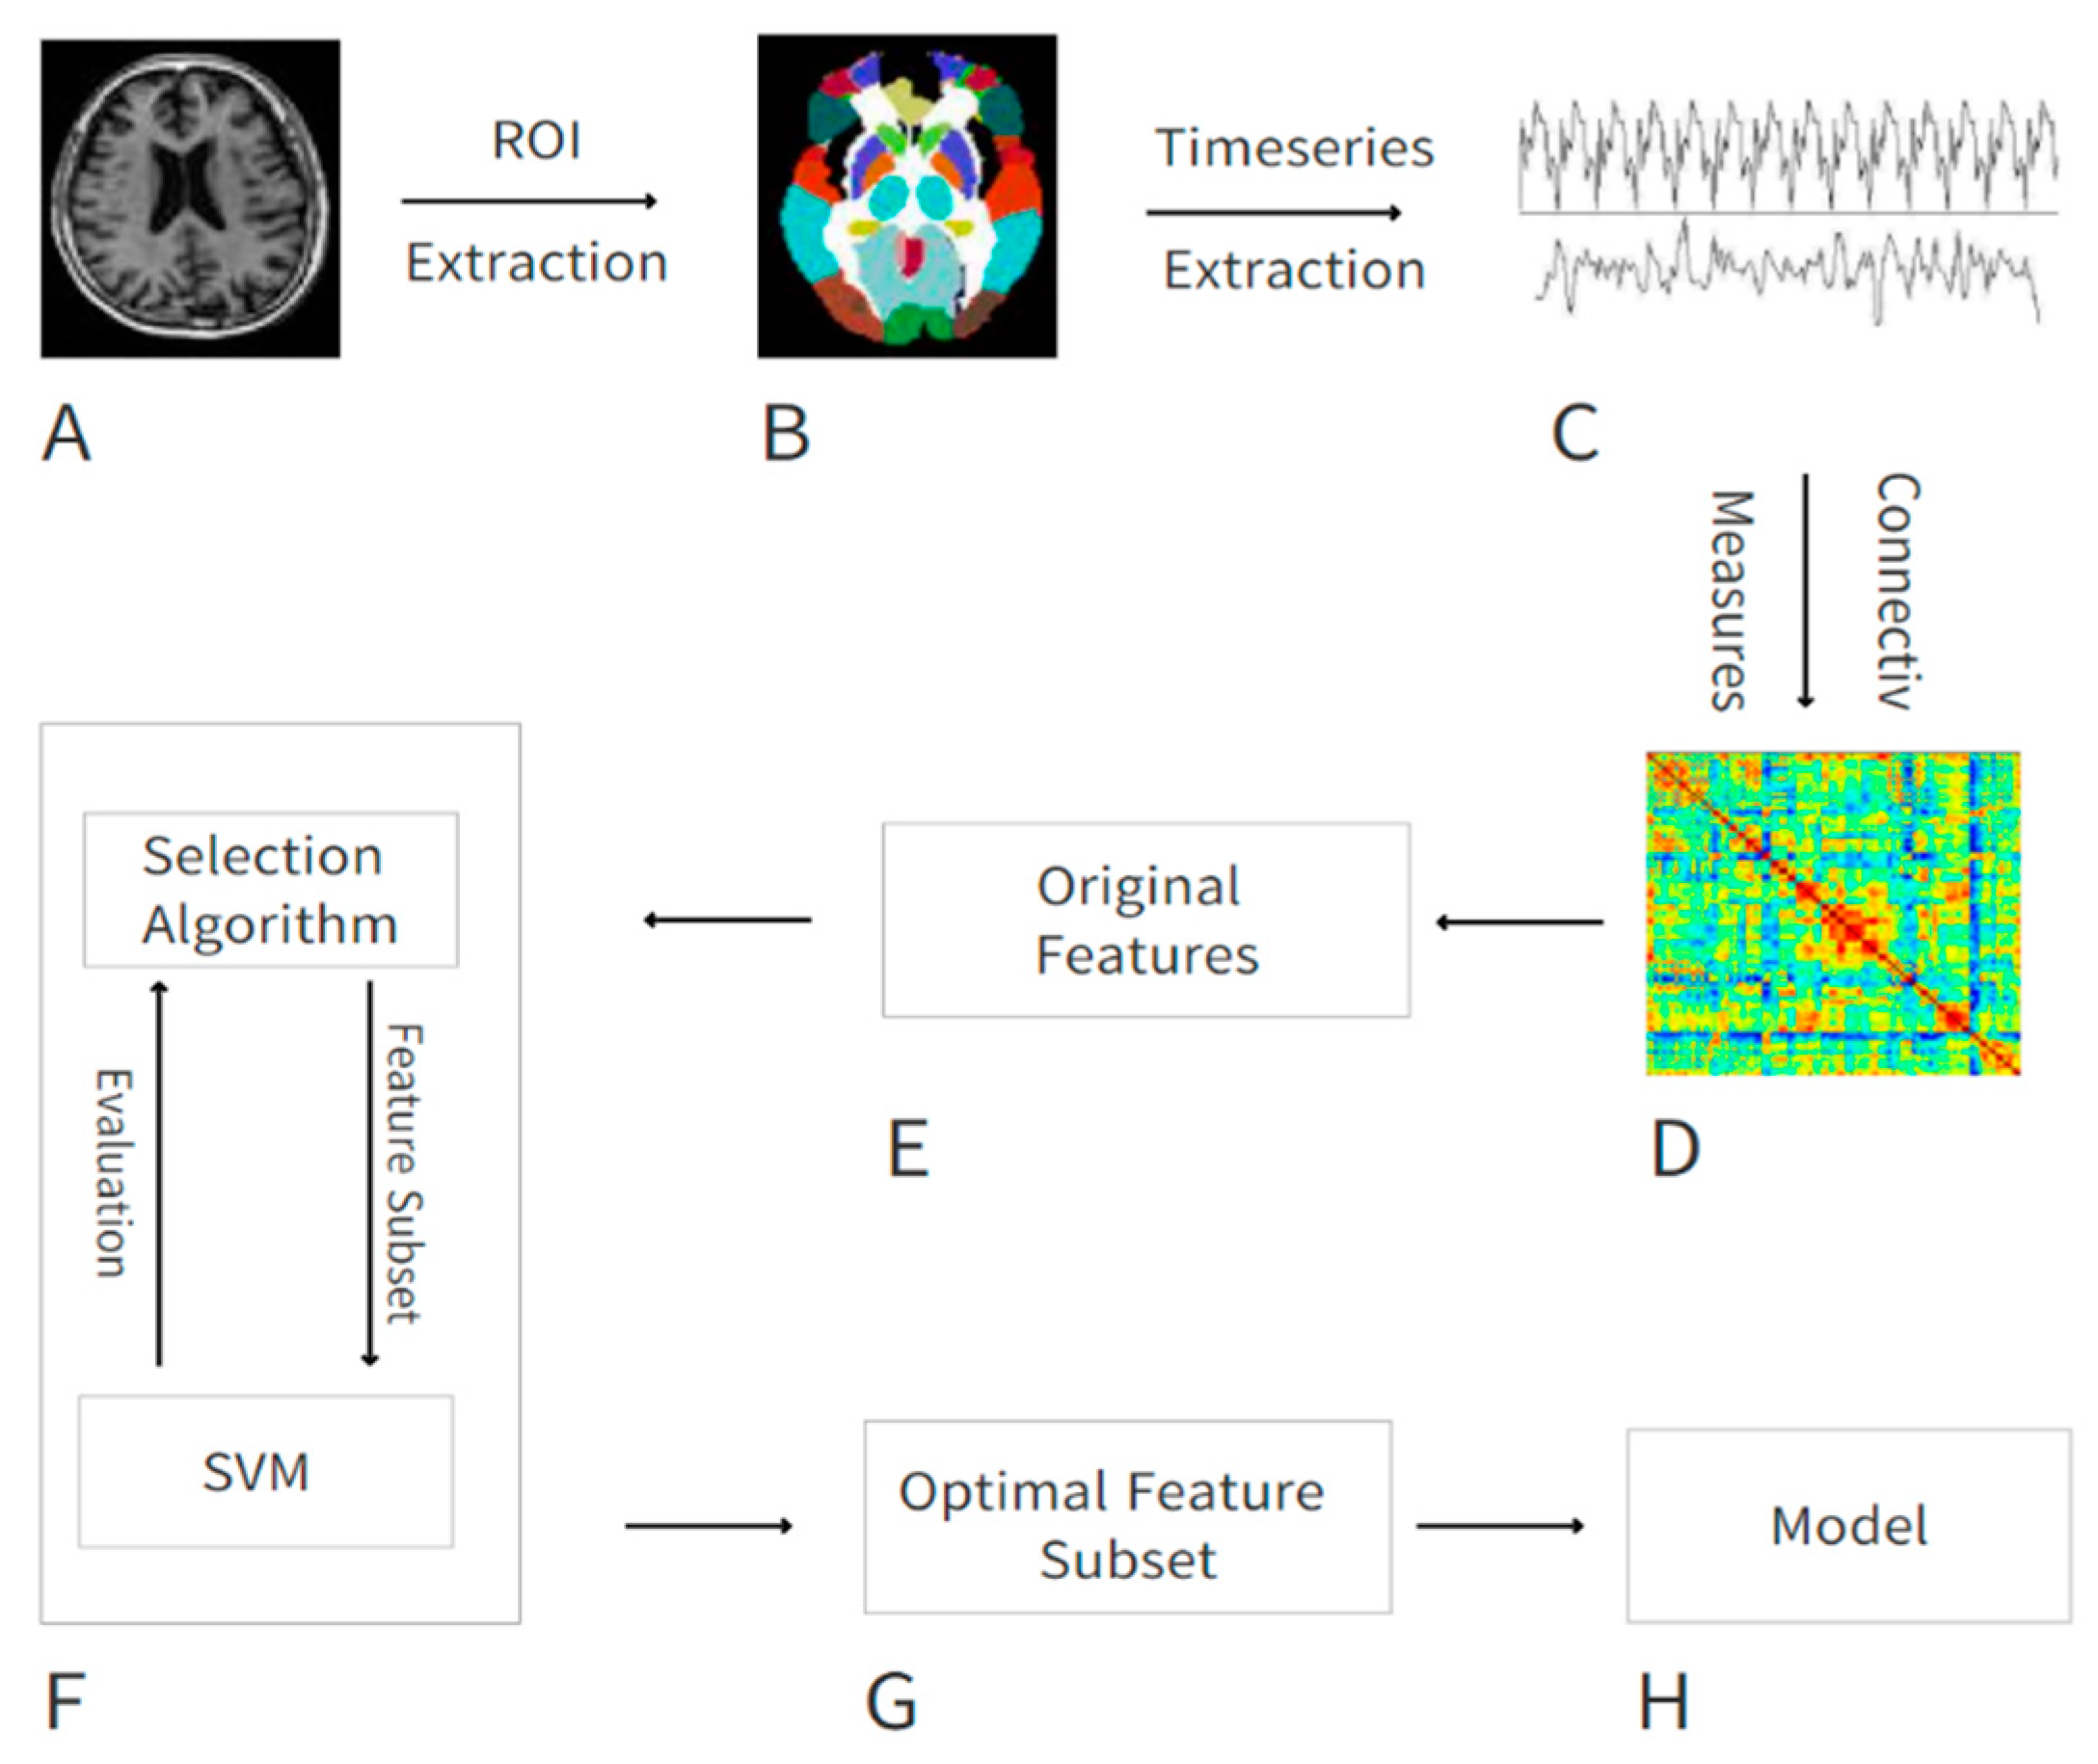

### Extract features with nilearn masker

Compute a correlation matrix, representing regional coactivation between regions and extract signals from a brain parcellation 


In [16]:
from nilearn.maskers import MultiNiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

# create masker using MultiNiftiMapsMasker to extract functional data within
# atlas parcels from multiple subjects using parallelization to speed up the
# # computation
masker = MultiNiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    n_jobs=2, verbose=0
)

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(
    kind="correlation", vectorize=True, discard_diagonal=True)


# METHOD 2

# extract time series from all subjects
#time_series = masker.fit_transform(data_adhd, confounds=data_confounds)

# calculate correlation matrices across subjects and display
#correlation_matrices = connectome_measure.fit_transform(time_series)


**Extract fMRI connectivity features from every subject.**



In [17]:
all_features = [
    connectome_measure.fit_transform([masker.fit_transform(sub, confounds=data.confounds[i])])[0]
    for i, sub in enumerate(data.func)
]




1. **Extracting fMRI Connectivity Features**:
   - We want to analyze the functional MRI (fMRI) data from each subject to understand how different brain regions are connected or related.
   - To do this, we use the `correlation_measure` object we created earlier. This object knows how to compute correlation matrices, which show the strength of connections between brain regions.
   - We also use the `masker` object we set up to extract data from specific brain regions defined in the atlas.
   - The `fit_transform` method of the `masker` object takes the fMRI data from each subject (`sub`) and extracts information from the brain regions defined in the atlas. We also provide confound data to control for any factors that might influence the results.
   - Then, we pass this extracted data to the `correlation_measure` object's `fit_transform` method to compute the correlation matrices.
   - This process is repeated for each subject in the dataset (`data.func`), and the resulting correlation matrices are stored in the `all_features` list.

2. **Understanding the Code**:
   - `enumerate(data.func)`: This iterates over the functional MRI data for each subject (`sub`) in the dataset, providing both the index (`i`) and the data itself.
   - `correlation_measure.fit_transform(...)`: This computes the correlation matrices for the extracted data.
   - `[0]` at the end of the list comprehension: This is just accessing the first (and only) element in the list returned by `fit_transform`, as we're only interested in the correlation matrices.

In summary, we're using the `masker` and `correlation_measure` objects to process the fMRI data from each subject, extract connectivity features, and compute correlation matrices to understand how different brain regions are connected. These correlation matrices are then stored in the `all_features` list for further analysis.

In [18]:
# Let's save the data to disk

np.savez_compressed('ADHD_Difumo_featuress.npz',a = all_features)

In [99]:
# Load the features

feat_file = 'ADHD_Difumo_featuress.npz'
X_features = np.load(feat_file)['a']

print('Features shape:', X_features.shape)

Features shape: (40, 2016)


The 2016 features represent matrices of correlations.

1. **Number of Subjects**:
   - We have data for 40 subjects, as indicated by the first dimension of the shape `(40, 2016)`.

2. **Number of Features**:
   - Each subject has a set of features associated with it.
   - In this case, each subject's features consist of a correlation matrix.
   - The correlation matrix represents the strength of connections between different brain regions.
   - Since each correlation matrix has been vectorized (flattened into a one-dimensional array) using the `vectorize=True` parameter when computing connectivity measures, each matrix is represented by 2016 features.


So, each of the 2016 features corresponds to a specific connection between two brain regions in the correlation matrix. Each subject's set of features contains information about how strongly these connections are correlated.

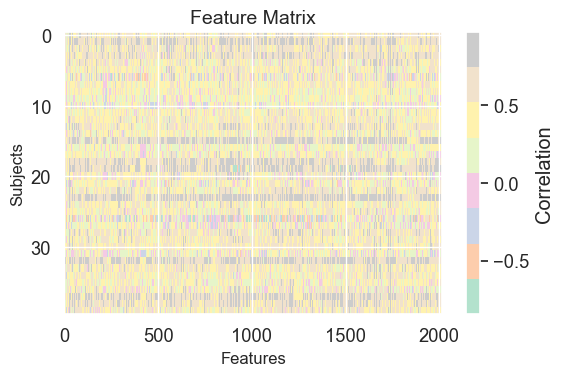

In [100]:
# Create the plot
plt.figure(figsize=(6, 4))
plt.imshow(X_features, aspect='auto', cmap='Pastel2', interpolation='nearest')

# Add colorbar
plt.colorbar(label='Correlation')

# Add title and labels
plt.title('Feature Matrix', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Subjects', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Prepare data for machine learning

In [101]:
y_adhd = pheno['adhd']

print('y type:',type(y_adhd))
print('X type:',type(X_features))

y type: <class 'pandas.core.series.Series'>
X type: <class 'numpy.ndarray'>


In [102]:
from sklearn.model_selection import train_test_split

# Split the sample into training/test, stratify by age class, and shuffle the data
X_train, X_test, y_train, y_test = train_test_split(
    X_features,  # X 
    y_adhd,  # y 
    test_size=0.4,  # 60%/40% split
    shuffle=True,  # shuffle dataset before splitting
    stratify=y_adhd,  # keep distribution of class consistent between train & test sets.
    random_state=123  # same shuffle each time
)

# Print the size of the training and test sets
print('training:', len(X_train), 'testing:', len(X_test))

training: 24 testing: 16


This code snippet utilizes the `train_test_split` function from scikit-learn to split the dataset into training and testing sets for machine learning:

1. **Splitting the Data**:
   - `train_test_split` divides the dataset into training and testing subsets.
   - `X_features` represents the feature matrix containing the correlation features, and `y_adhd` is the target variable indicating ADHD diagnosis.
   - `test_size=0.2` specifies that 20% of the data will be used for testing, while 80% will be used for training.
   - `shuffle=True` ensures that the data is shuffled before splitting to prevent any potential biases in the dataset.
   - `stratify=y_adhd` ensures that the distribution of ADHD diagnosis classes is maintained in both the training and testing sets. This is important for ensuring representative samples in each subset.
   - `random_state=123` sets the seed for random number generation, ensuring reproducibility of the split.

2. **Printing Sizes of Sets**:
   - The sizes of the training and testing sets are printed using `len(X_train)` and `len(X_test)` respectively.

This process ensures that we have separate datasets for training and testing our machine learning models, with appropriate proportions and balanced class distributions.



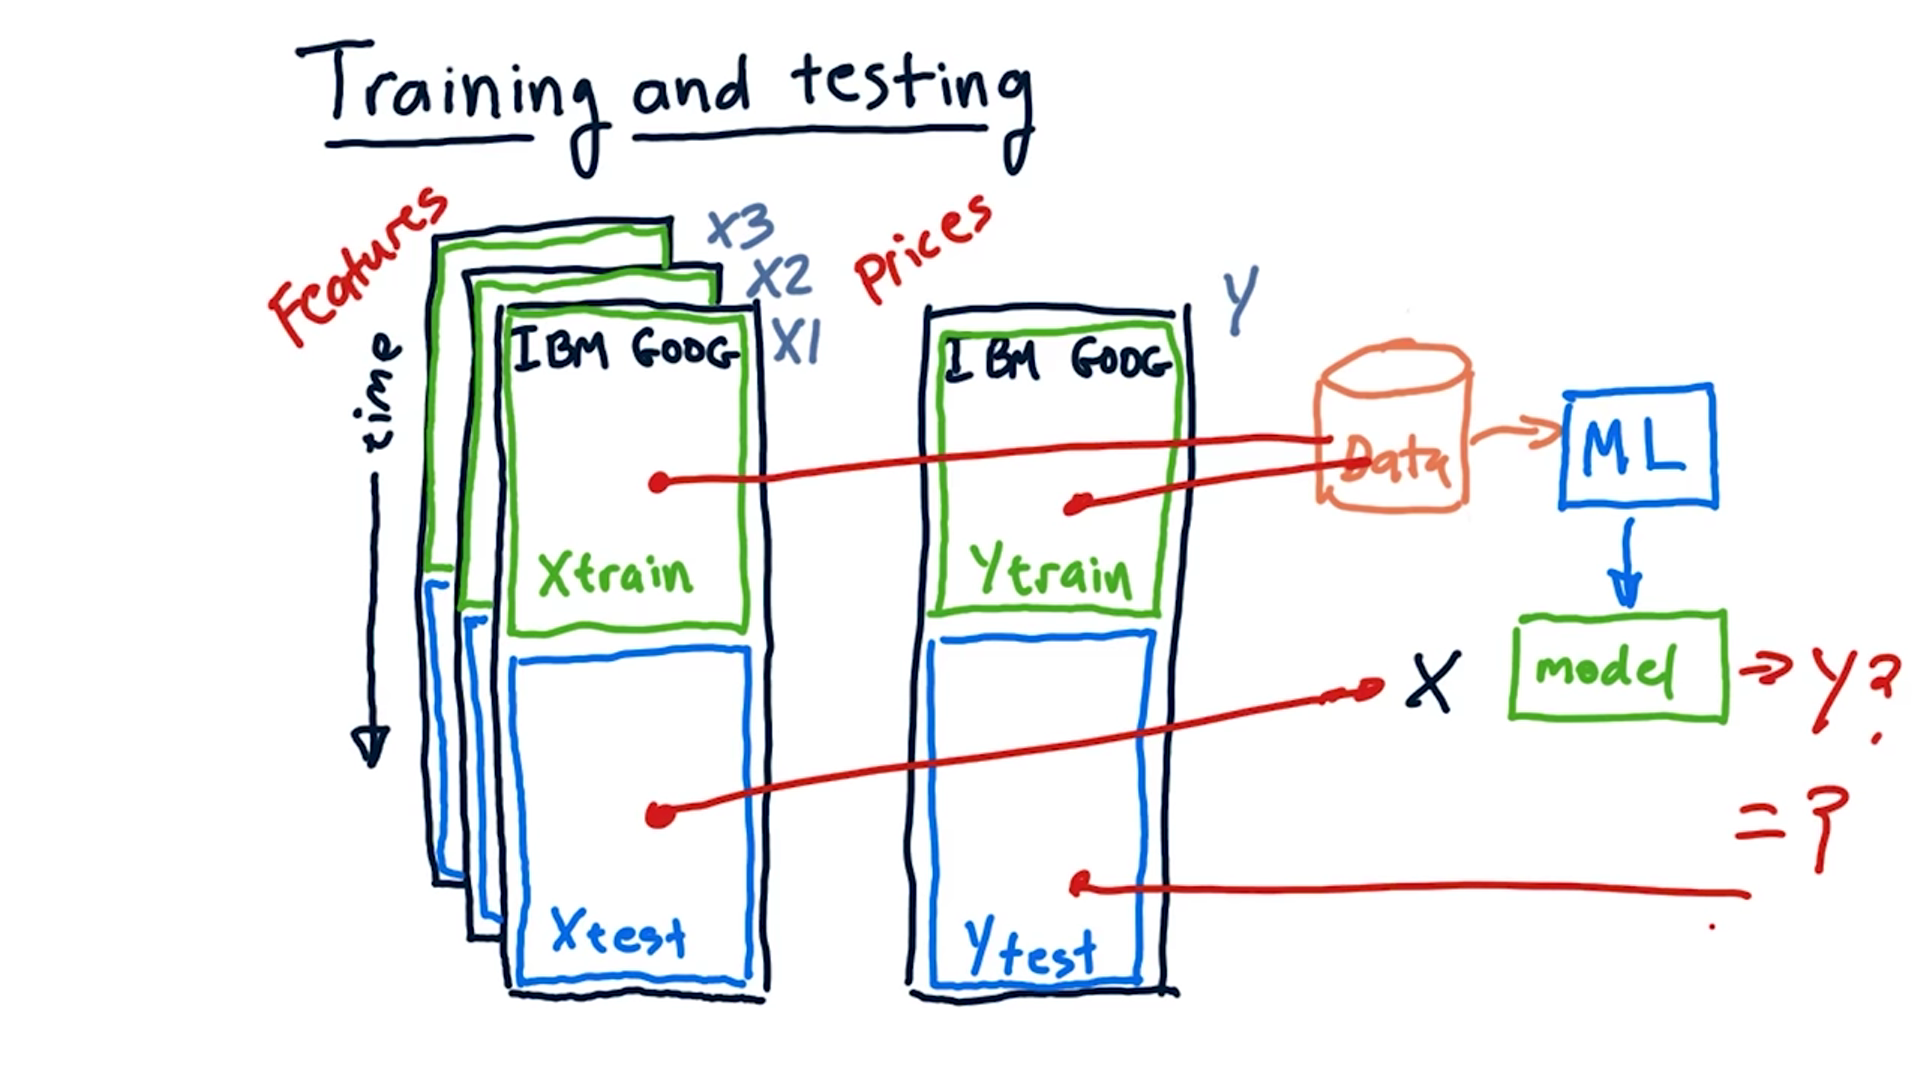

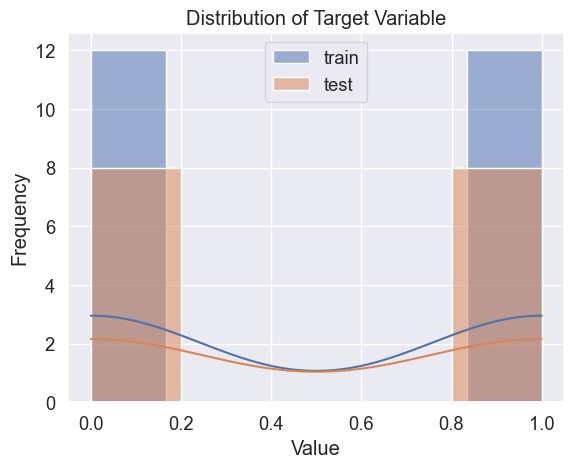

training: 24 testing: 16


In [103]:
# Check data distribution
sns.histplot(y_train, label='train', kde=True)
sns.histplot(y_test, label='test', kde=True)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

# Print the size of the training and test sets
print('training:', len(X_train), 'testing:', len(X_test))


## Run our model!

We'll start with a standard classification model called a Support Vector Classifier (SVC)

Despite its simplicity, this model shines in its ability to deliver robust results. Given our data constraints, a straightforward approach often proves to be the most effective.

In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of the Support Vector Classifier
svc_model = SVC()

# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Expand range of penalty parameter C
    'kernel': ['linear'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Expand range of gamma values
}

# Define cross-validation technique (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

This code runs a Support Vector Classifier (SVC) model and performs hyperparameter tuning using grid search cross-validation:

1. **Creating the SVC Model**:
   - An instance of the Support Vector Classifier (SVC) is created with the default hyperparameters.

2. **Defining Hyperparameters to Tune**:
   - Hyperparameters are parameters that are not directly learned by the model during training but affect the learning process. In this case, we're tuning the following hyperparameters:
     - `C`: Penalty parameter C, which controls the trade-off between a smooth decision boundary and correctly classifying training points.
     - `kernel`: The kernel type to be used in the algorithm. Here, we're using a linear kernel.
     - `gamma`: The kernel coefficient for certain kernel types. For a linear kernel, this parameter is ignored.

3. **Performing Grid Search Cross-Validation**:
   - Grid search cross-validation is used to find the best combination of hyperparameters.
   - It systematically evaluates different combinations of hyperparameters using cross-validation to determine which combination yields the best performance.
   - The `cv` parameter specifies the number of folds for cross-validation, which is set to 5 here.

4. **Getting the Best Parameters**:
   - After grid search is complete, the best combination of hyperparameters is obtained using `grid_search.best_params_`.

Overall, this code efficiently tunes the hyperparameters of the SVC model to optimize its performance on the training data.

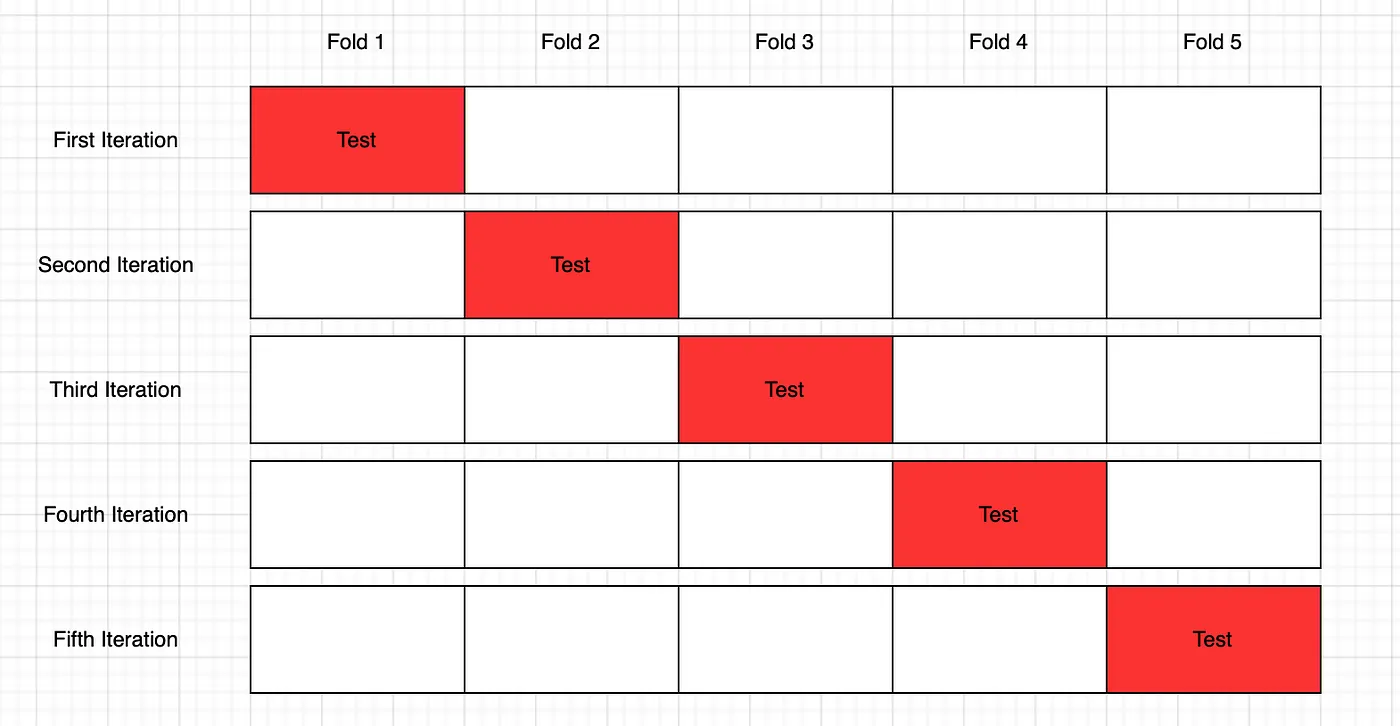

In [105]:

# Train the model with the best parameters
best_svc_model = SVC(**best_params)
best_svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svc_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.50      0.75      0.60         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.47        16
weighted avg       0.50      0.50      0.47        16



Classification report:

- **Precision:** How precise the model's positive predictions are.
- **Recall:** How many actual positives the model can identify.
- **F1-score:** A balance between precision and recall.
- **Support:** The number of instances for each class.
- **Accuracy:** Overall correctness of the model's predictions.

Support Vector Classifier (SVC) model with the best parameters obtained from grid search cross-validation, makes predictions on the test data, and evaluates the model's performance:

1. **Training the Model with Best Parameters**:
   - We create an instance of the SVC model (`best_svc_model`) using the best parameters obtained from grid search cross-validation.
   - The `SVC` class from scikit-learn is used, and we pass the best parameters (`**best_params`) to initialize the model.
   - We then fit the model to the training data (`X_train` and `y_train`) using the `fit` method.

2. **Making Predictions**:
   - After training the model, we use it to make predictions on the test data (`X_test`) using the `predict` method.
   - The predicted labels are stored in the variable `y_pred`.

3. **Evaluating Model Performance**:
   - We compute the accuracy of the model by comparing the predicted labels (`y_pred`) with the true labels (`y_test`) using the `accuracy_score` function.
   - Additionally, we generate a classification report using the `classification_report` function, which provides metrics such as precision, recall, and F1-score for each class.
   - The accuracy and classification report are printed to assess the model's performance on the test data.

The output shows the best parameters obtained from grid search cross-validation, the accuracy of the model on the test data, and the classification report containing performance metrics for each class (0 and 1) as well as aggregated metrics. In this example, the accuracy is 0.5, indicating moderate performance.

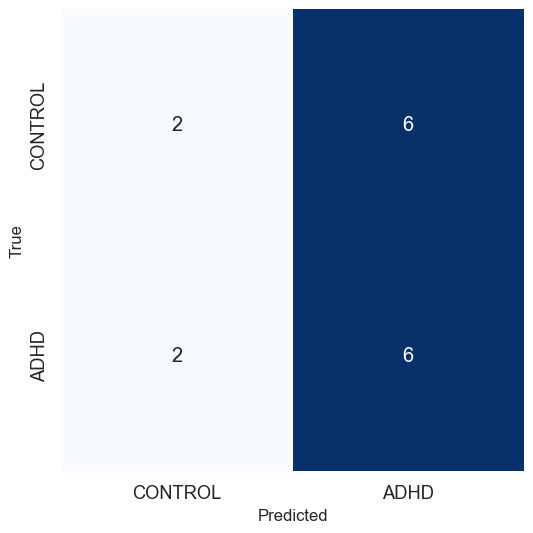

In [106]:
# Compute and plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a prettier confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    square=True,
    xticklabels=['CONTROL', 'ADHD'],
    yticklabels=['CONTROL', 'ADHD'],
)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("True", fontsize=12)
plt.title("", fontsize=15)
plt.show()

Interpretation of the classification report:

- **Control**:
  - Precision: 0.50
    - 50% of the instances predicted as control were actually control. 
  - Recall: 0.25
    - 25% of the actual Control instances were correctly identified by the model.
  - F1-score: 0.33
    - This metric combines both precision and recall into a single value.
  - Support: 8
    - There are 8 instances of control in the test dataset.

- **ADHD**:
  - Precision: 0.50
    - 50% of the instances predicted as ADHD were actually ADHD.
  - Recall: 0.75
    - 75% of the actual ADHD instances were correctly identified by the model.
    - The model did a better job of capturing ADHD instances compared to control.
  - F1-score: 0.60
    - This indicates a better balance between precision and recall compared to control.
  - Support: 8
    - There are also 8 instances of ADHD in the test dataset.

## Interpreting model feature importance

In [107]:
correlation_measure = connectome_measure

connectome_measure.inverse_transform(best_svc_model.coef_).shape

(1, 64, 64)


1. **Interpreting Model Feature Importance**:
   - We're trying to understand which brain regions (features) are most important for predicting ADHD using the SVM model.
   - To do this, we look at the coefficients (weights) assigned to each feature by the SVM model.

2. **Coefficient Shape**:
   - After processing, we have a set of coefficients, each corresponding to a pair of brain regions.
   - The shape of these coefficients is (1, 64, 64), which means we have one set of coefficients for each pair of brain regions.

3. **Plotting Feature Importance**:
   - We visualize these coefficients using a bar plot.
   - Each bar represents the weight assigned to a specific pair of brain regions by the SVM model.
   - The x-axis shows the brain regions (features), and the y-axis shows the weights.
   - We set the background color of the plot to dark blue for better visibility.

Essentially, this plot helps us understand which brain regions have the most influence on predicting ADHD based on their correlations. Each bar's height represents how important that specific brain region is in making accurate predictions.

Text(0, 0.5, 'weight')

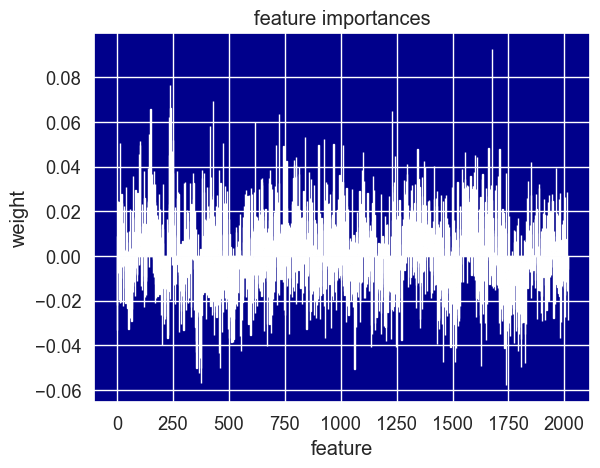

In [108]:
# Get the coefficients (weights) of the linear SVM model from best_estimator
coefficients = best_svc_model.coef_



plt.bar(range(coefficients.shape[-1]),coefficients[0])
plt.gca().set_facecolor('darkblue')  # Change background color
plt.title('feature importances')
plt.xlabel('feature')
plt.ylabel('weight')


1. **Interpreting Model Feature Importance**:
   - This line of code aims to interpret the feature importance of the SVM model.
   - `correlation_measure.inverse_transform(best_svc_model.coef_)` is a function call that helps transform the coefficients of the SVM model back to the original space of the features.
   - The result of this transformation is stored in the variable `feat_exp_matrix`.

2. **Understanding the Result**:
   - `feat_exp_matrix` represents the feature importance matrix obtained from the SVM model.
   - Each element in `feat_exp_matrix` corresponds to the importance or weight assigned to a specific feature (in this case, the correlation between different brain regions).
   - The shape of `feat_exp_matrix` is `(64, 64)`, indicating that it is a square matrix where each row and column correspond to one of the 64 brain regions.


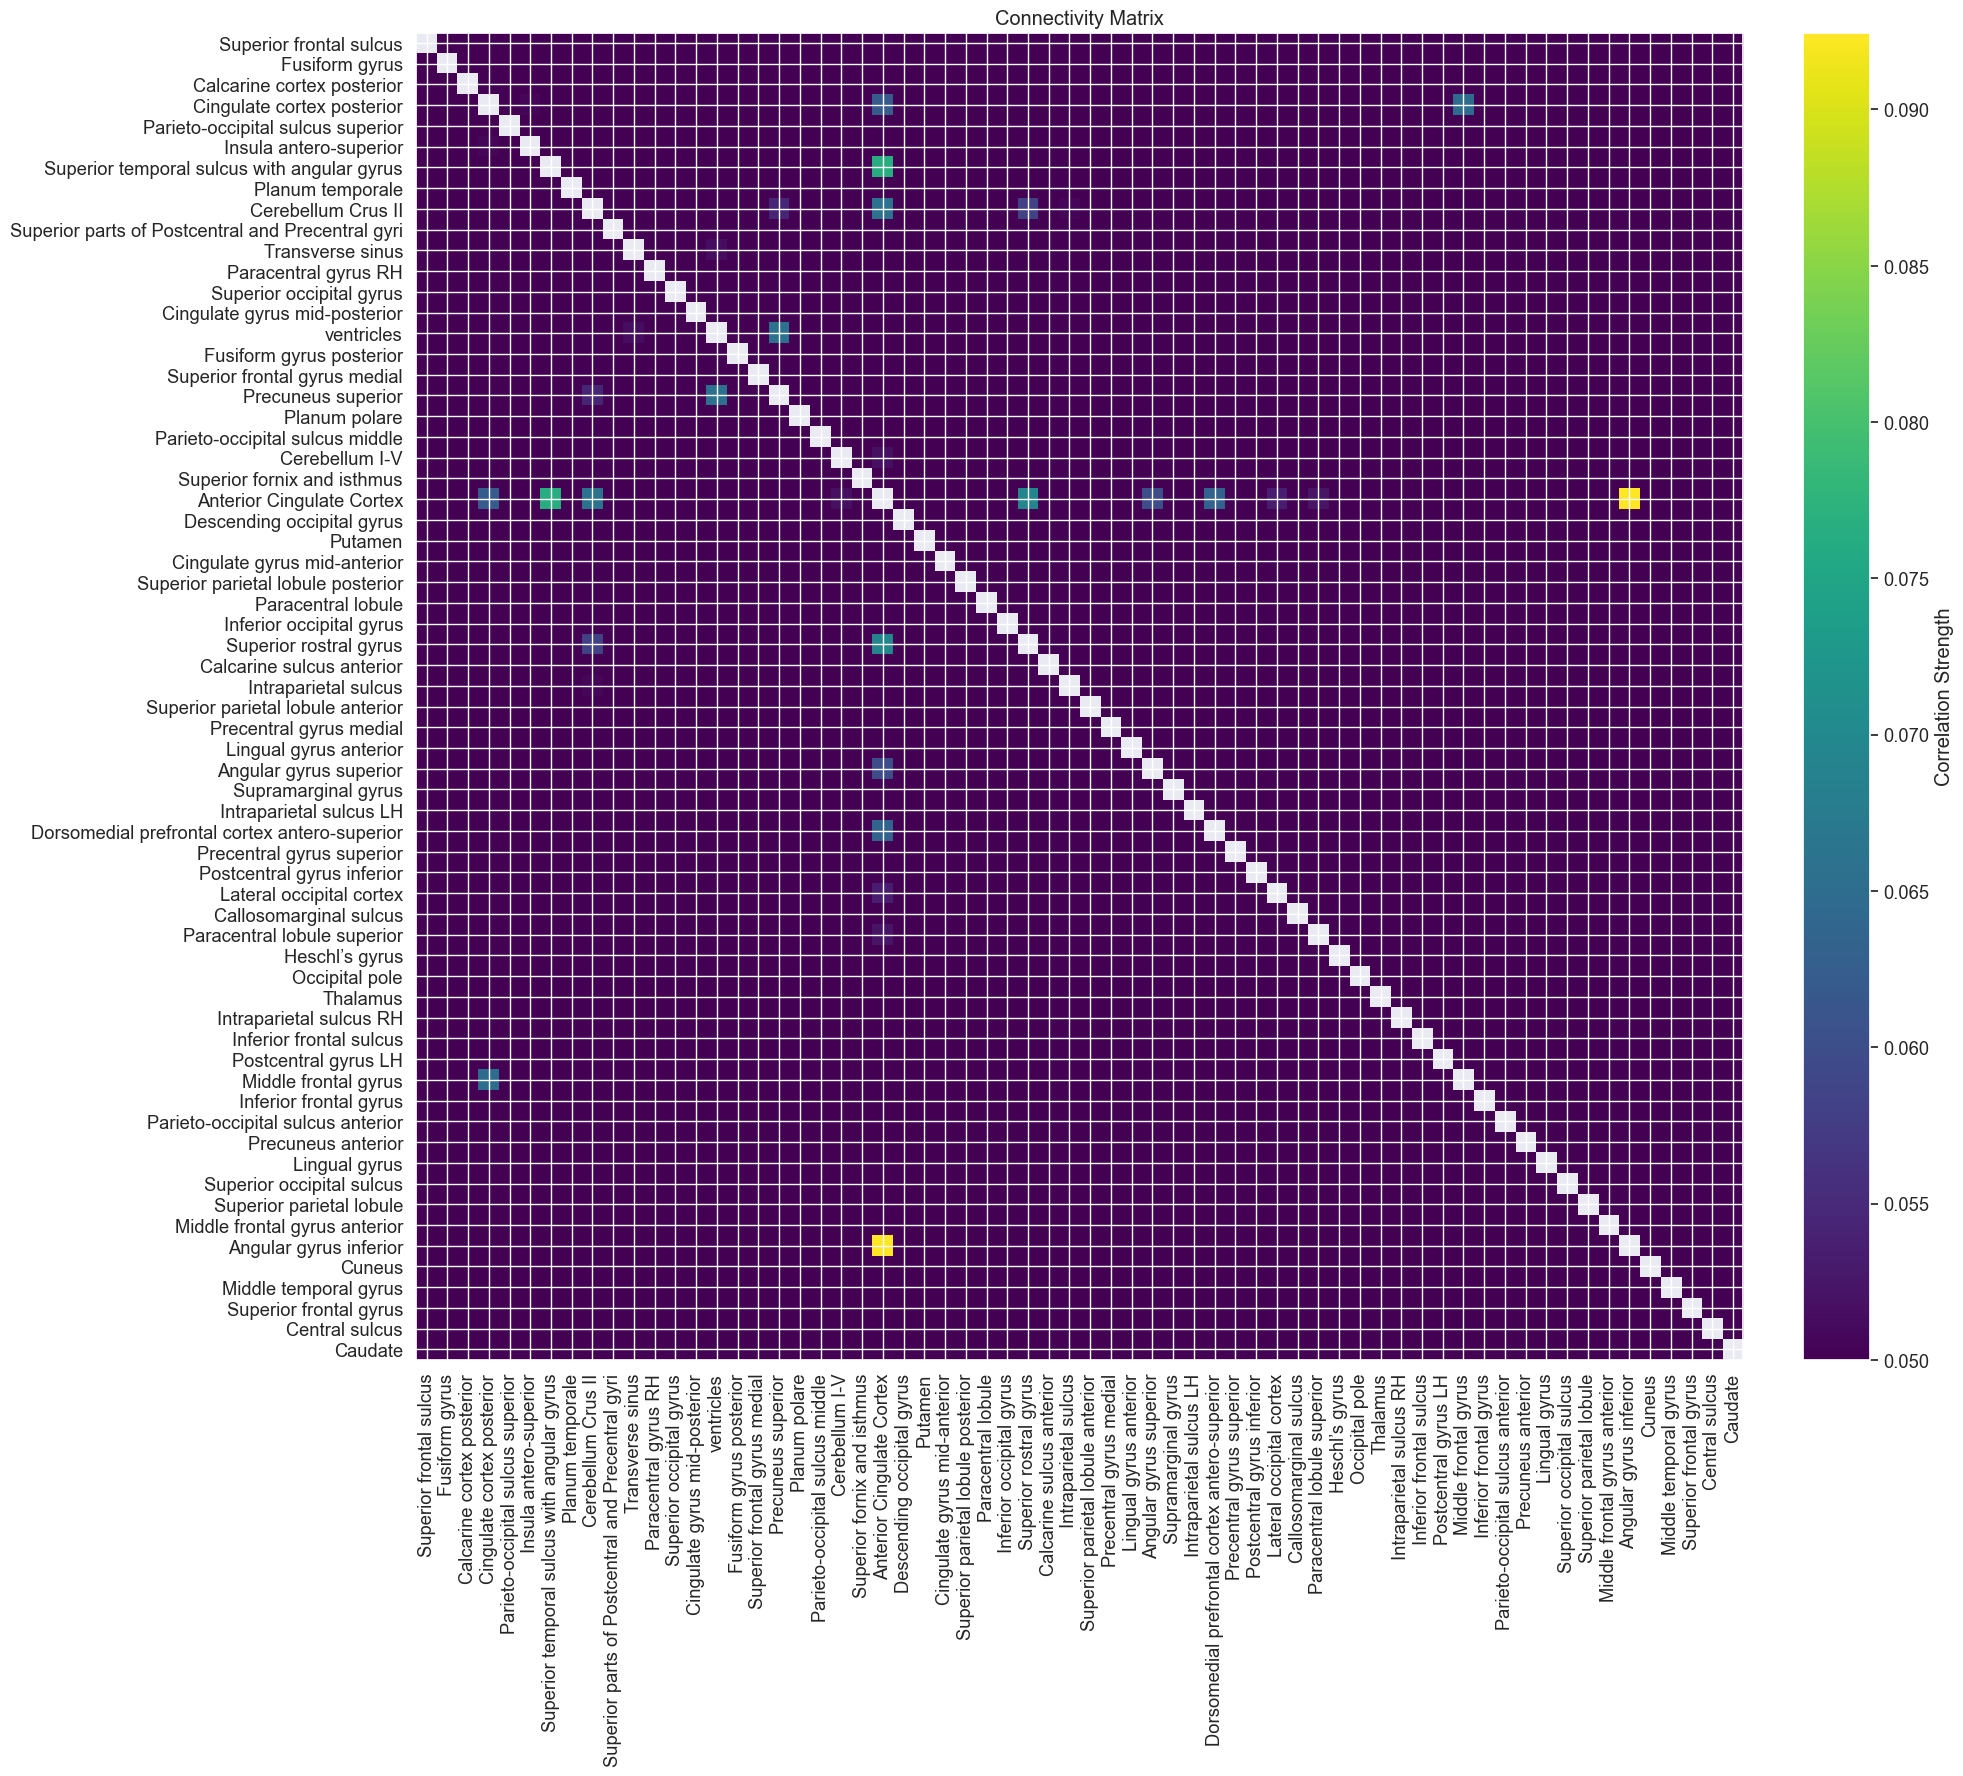

In [109]:
feat_exp_matrix = correlation_measure.inverse_transform(best_svc_model.coef_)[0]

# Define a threshold to visualize only higher values
threshold = 0.05  # Adjust this threshold as needed

labels = difumo.labels["difumo_names"]

# Replace diagonal with NaN to remove it from the plot
np.fill_diagonal(feat_exp_matrix, np.nan)

# Plot the matrix
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
plt.imshow(feat_exp_matrix, cmap='viridis', origin='upper', vmin=threshold)
plt.colorbar(label='Correlation Strength', fraction=0.046, pad=0.04)  # Adjust color bar position

# Add labels to the ticks
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=range(len(labels)), labels=labels)

# Add title
plt.title('Connectivity Matrix')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

This code iterates over the correlation matrix and prints the correlation values between different brain regions that exceed the specified threshold.

1. **Iteration Over the Matrix**:
   - The code uses nested loops to iterate over each element of the correlation matrix.
   - The outer loop (`for i in range(len(labels))`) iterates over the rows of the matrix, representing one brain region.
   - The inner loop (`for j in range(len(labels))`) iterates over the columns of the matrix, representing another brain region.

2. **Condition for Printing**:
   - Within the nested loops, the code checks if the current element is not on the diagonal (i.e., `i != j`) to avoid printing self-correlations.
   - It also checks if the correlation value (`feat_exp_matrix[i, j]`) is greater than or equal to the specified threshold.

3. **Printing Correlation Values**:
   - If both conditions are met, the code prints the names of the two brain regions (`labels[i]` and `labels[j]`) along with their correlation value.


In [110]:
# Define a threshold to visualize only higher values
threshold = 0.07  # Adjust this threshold as needed

# Iterate over the correlation matrix and print the values
for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j and feat_exp_matrix[i, j] >= threshold:
            print(f"{labels[i]} - {labels[j]}: {feat_exp_matrix[i, j]}")


Superior temporal sulcus with angular gyrus - Anterior Cingulate Cortex: 0.0765332938457802
Anterior Cingulate Cortex - Superior temporal sulcus with angular gyrus: 0.0765332938457802
Anterior Cingulate Cortex - Angular gyrus inferior: 0.09245993901160833
Angular gyrus inferior - Anterior Cingulate Cortex: 0.09245993901160833


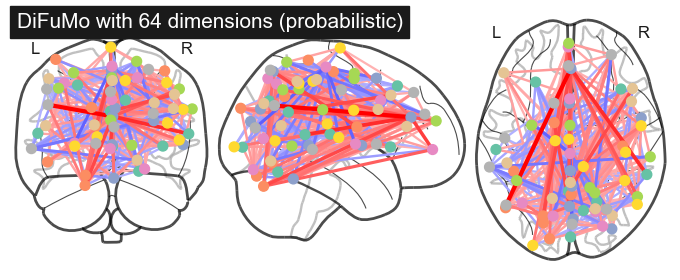

In [111]:

# grab center coordinates for probabilistic atlas
coordinates = plotting.find_probabilistic_atlas_cut_coords(
    maps_img=difumo.maps
)

# plot connectome with 85% edge strength in the connectivity
plotting.plot_connectome(
    feat_exp_matrix,
    coordinates,
    edge_threshold="85%",
    title=f"DiFuMo with {dim} dimensions (probabilistic)",
)
plotting.show()



1. **Grabbing Center Coordinates for Probabilistic Atlas**:
   - `coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=difumo.maps)`: This line of code uses the `find_probabilistic_atlas_cut_coords()` function from the `plotting` module in Nilearn to extract the center coordinates for the probabilistic atlas.
   - The `maps_img=difumo.maps` argument specifies the probabilistic atlas image from which the coordinates will be extracted.

2. **Plotting the Connectome**:
   - `plotting.plot_connectome()`: This function is used to visualize connectivity networks (connectomes) using brain surface plots or scatter plots.
   - Arguments:
     - `feat_exp_matrix`: The feature importance matrix or the connectivity matrix to be visualized.
     - `coordinates`: The coordinates of brain regions, typically obtained from the atlas used to parcellate the brain.
     - `edge_threshold="85%"`: Specifies the threshold for displaying edges (connections) in the connectome. Here, "85%" means that only edges with strengths in the top 85% will be displayed.
     - `title=f"DiFuMo with {dim} dimensions (probabilistic)"`: The title of the plot. It dynamically includes the dimensionality (`dim`) of the DiFuMo atlas used and specifies that it's a probabilistic atlas.
   
3. **Displaying the Plot**:
   - `plotting.show()`: This function displays the plot generated by the `plot_connectome()` function.

It highlights strong connections between brain regions while excluding weaker connections based on the specified threshold. The resulting plot provides insights into the organization of brain networks derived from the connectivity data.

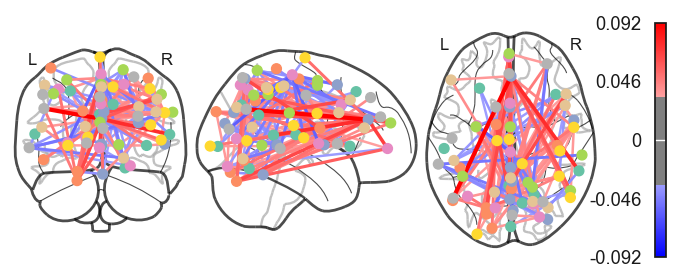

In [112]:
# Create a connectome map where each node is an ROI

coords = plotting.find_probabilistic_atlas_cut_coords(
    maps_img=difumo.maps
)

plotting.plot_connectome(feat_exp_matrix, coords, colorbar=True, edge_threshold=0.035)

In [113]:
plotting.view_connectome(feat_exp_matrix, coords, edge_threshold='98%',
                        edge_cmap='viridis')

In [114]:
threshold = 0.09  # Adjust this threshold as needed

# Iterate over the correlation matrix and print the values
for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j and feat_exp_matrix[i, j] >= threshold:
            print(f"{labels[i]} - {labels[j]}: {feat_exp_matrix[i, j]}")


Anterior Cingulate Cortex - Angular gyrus inferior: 0.09245993901160833
Angular gyrus inferior - Anterior Cingulate Cortex: 0.09245993901160833



 **Anterior Cingulate Cortex (ACC) - Angular Gyrus Inferior (AGI)**:
   - The correlation value is 0.09245993901160833.
   - These two brain regions are known to be involved in different cognitive functions:
     - The **Anterior Cingulate Cortex (ACC)** is associated with various cognitive processes, including attention allocation, emotion regulation, and error detection.
     - The **Angular Gyrus Inferior (AGI)** is primarily involved in language processing, semantic cognition, and numerical processing.
   - The positive correlation between ACC and AGI suggests that there is some degree of synchronized activity or connectivity between these regions during resting-state fMRI scans.
   - In the context of ADHD, alterations in the connectivity between these regions may reflect disruptions in attentional control, cognitive processing, or other functions related to ADHD symptomatology.
   - However, the correlation value is relatively low, indicating that the strength of connectivity between ACC and AGI is modest compared to other brain regions.



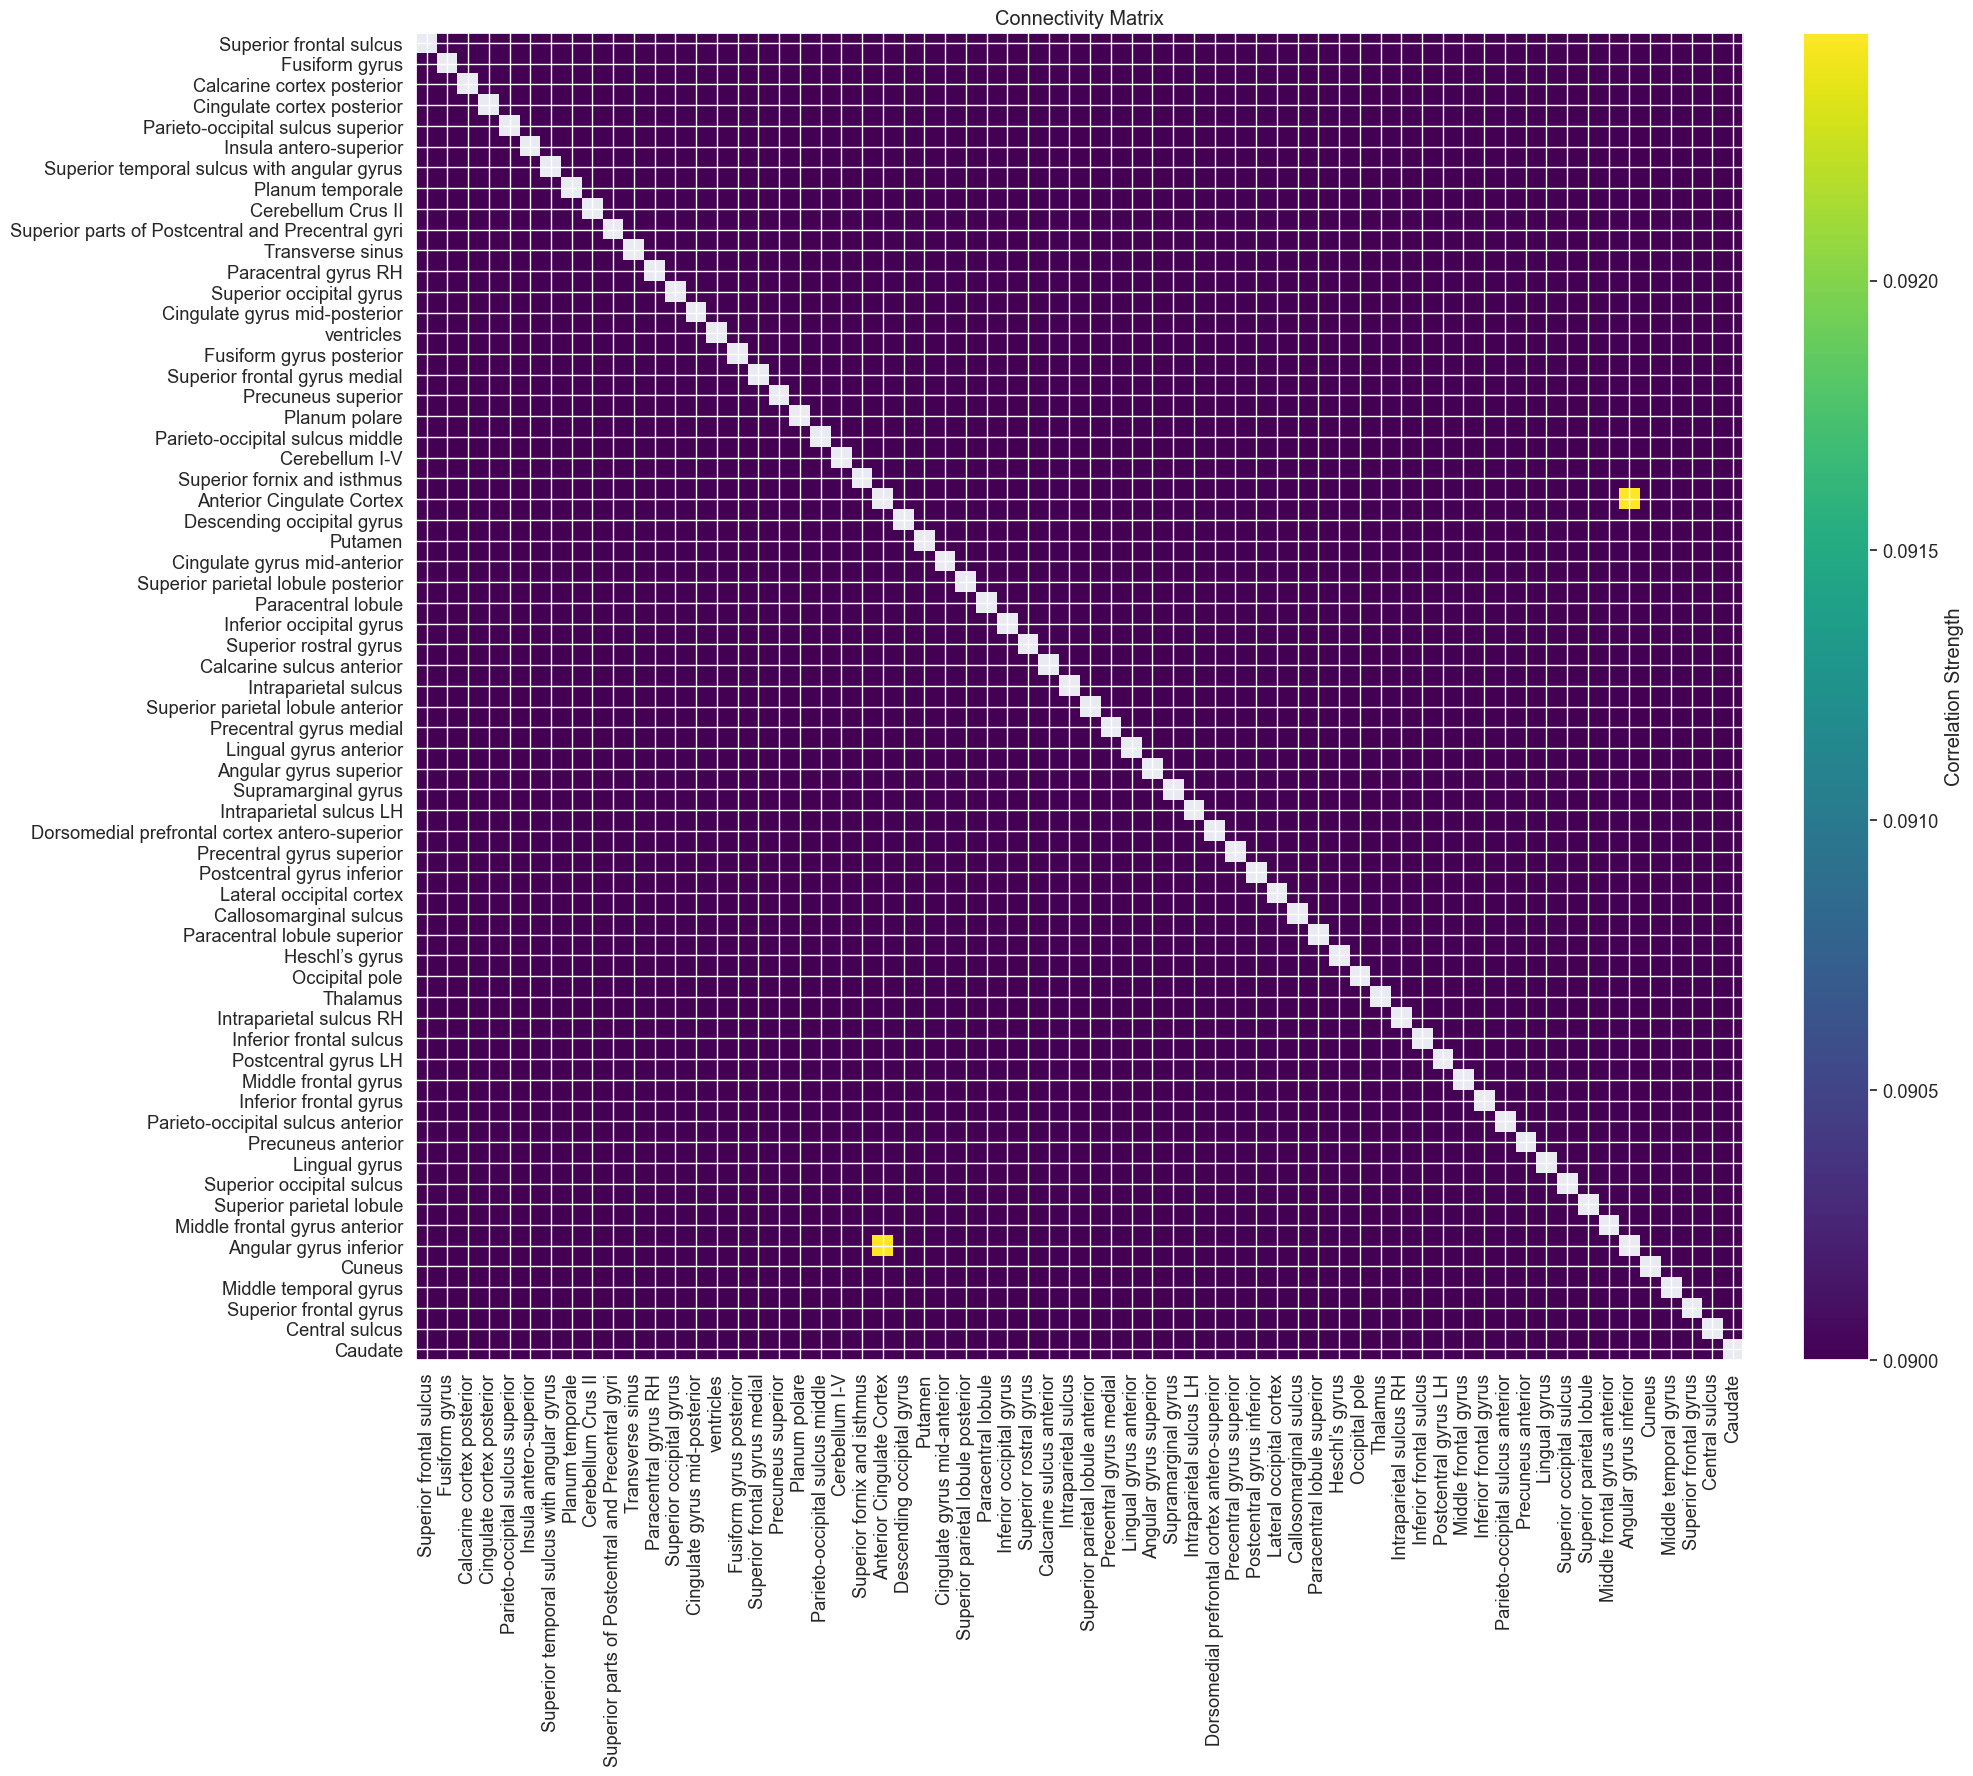

In [115]:


# Define a threshold to visualize only higher values
threshold = 0.09  # Adjust this threshold as needed

# Plot the matrix
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
plt.imshow(feat_exp_matrix, cmap='viridis', origin='upper', vmin=threshold)
plt.colorbar(label='Correlation Strength', fraction=0.046, pad=0.04)  # Adjust color bar position

# Add labels to the ticks
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)
plt.yticks(ticks=range(len(labels)), labels=labels)

# Add title
plt.title('Connectivity Matrix')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
